In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

# Load data

In [ ]:
URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=URL, extract=True)

68616192/68606236 [==============================] - 0s 0us/step


The dataset downloaded has following directory structure.

<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>cats_and_dogs_filtered</b>
|__ <b>train</b>
    |______ <b>cats</b>: [cat.0.jpg, cat.1.jpg, cat.2.jpg ....]
    |______ <b>dogs</b>: [dog.0.jpg, dog.1.jpg, dog.2.jpg ...]
|__ <b>validation</b>
    |______ <b>cats</b>: [cat.2000.jpg, cat.2001.jpg, cat.2002.jpg ....]
    |______ <b>dogs</b>: [dog.2000.jpg, dog.2001.jpg, dog.2002.jpg ...]
</pre>

## Assign variables with proper file path for the training and validation sets

In [ ]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

Understand the data

In [ ]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [ ]:
print('total train cats images: {}'.format(num_cats_tr))
print('total train dogs images: {}'.format(num_dogs_tr))

print('total validation cats images: {}'.format(num_cats_val))
print('total validation dogs images: {}'.format(num_dogs_val))

print('total training images: {}'.format(total_train))
print('total validation images: {}'.format(total_val))

total train cats images: 1000
total train dogs images: 1000
total validation cats images: 500
total validation dogs images: 500
total training images: 2000
total validation images: 1000


# Set model params

In [ ]:
BATCH_SIZE = 100
IMG_SHAPE = 150 # (px) To make all images be of the same shape

# Data augmentation

This is done to change the layout of the data so as to avoid overfitting.  
Random transformations are done to the data such as **flipping**, **zooming in** and **rotating**

In [ ]:
def plotImages(images):
    """Plot images in the form of a grid with 1 row, 5 cols"""
    fig, axes = plt.subplots(1,5, figsize=(20,20)) # 1 row, 5 cols, 20px each
    axes = axes.flatten()

    for img, ax in zip(images, axes):
        ax.imshow(img)

    plt.tight_layout()
    plt.show()

## Flip the image horizontally

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE, directory=train_dir, shuffle=True, target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


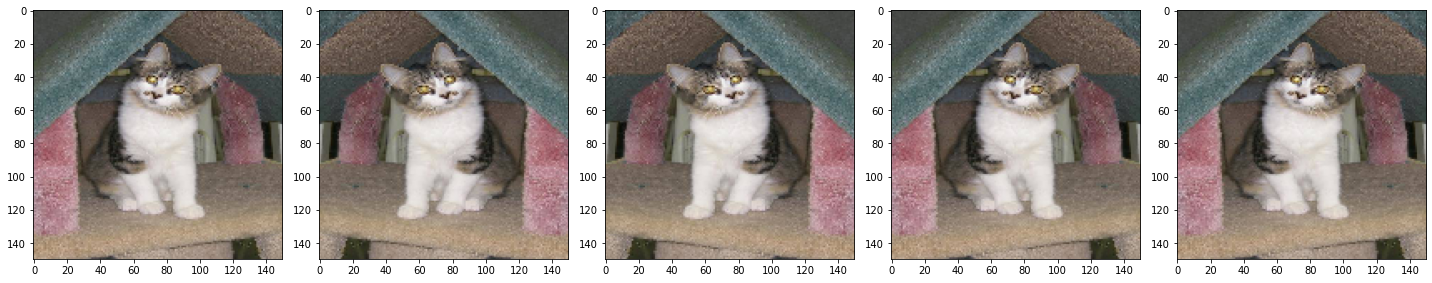

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

## Rotate an image  
> This randomly rotates an image upto a specified number of degrees

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45) # rotate upto 45 degrees

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE, directory=train_dir, shuffle=True, target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


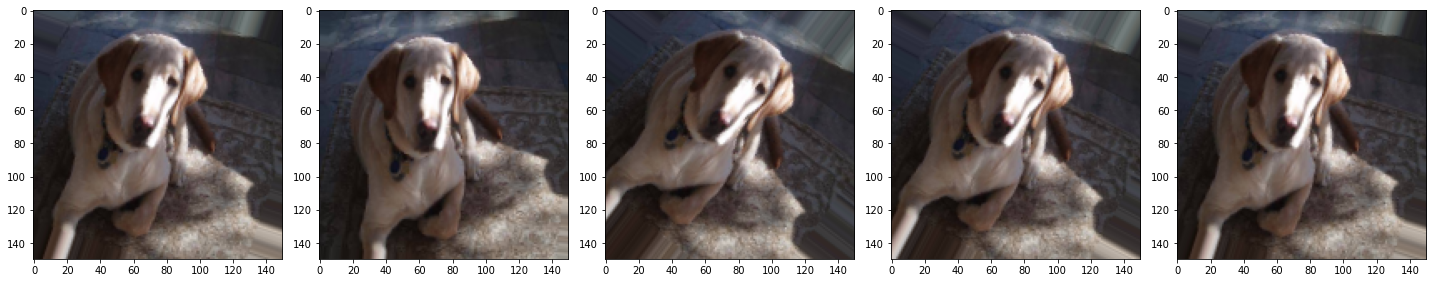

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

## Zooming in image

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) # zoom

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE, directory=train_dir, shuffle=True, target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


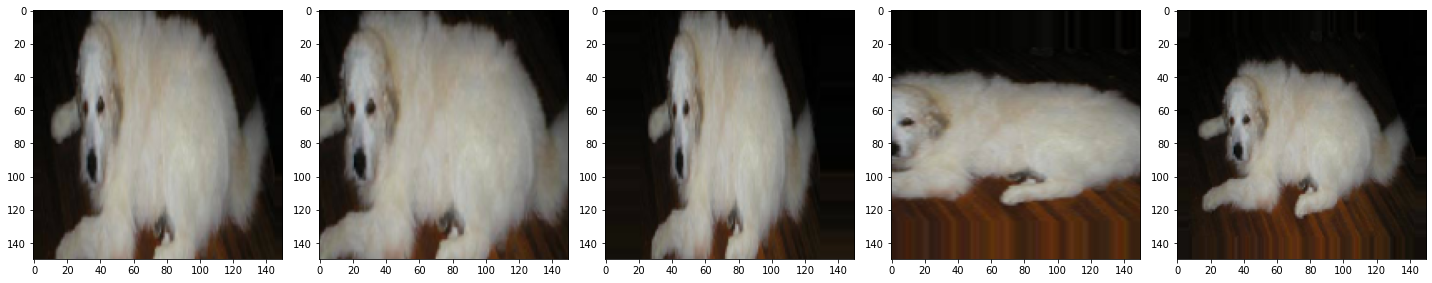

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

## combine zoom/rotating and flip

In [ ]:
image_gen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE, directory=train_dir, shuffle=True, target_size=(IMG_SHAPE, IMG_SHAPE), class_mode='binary')

Found 2000 images belonging to 2 classes.


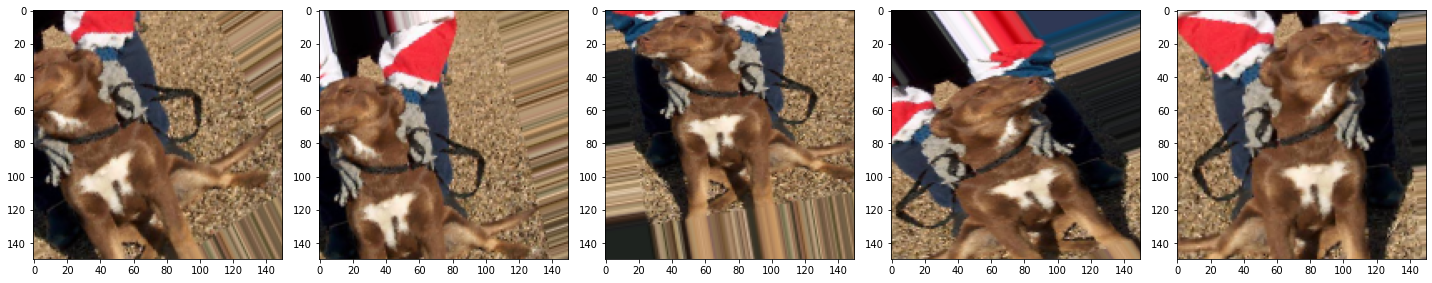

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

# Create validation data generator  
Data augmentation is only applied to training examples. Here, the validation images are only rescaled and converted into batches

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=validation_dir,
    target_size=(IMG_SHAPE, IMG_SHAPE),
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


# Model creation  
## Define the model  
> The model consists of four convolution blocks with max pool layer in each of them 

> There is also a dropout probability of 0.5, meaning a 50% probability of each neuron being turned off


In [ ]:
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),

    
    # dropout
     tf.keras.layers.Dropout(0.5),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(512, activation='relu'),
     tf.keras.layers.Dense(2, activation='softmax') # 2 classes - cat/dog
    ]
)

## Compile the model

In [ ]:
model.compile(
    optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

## Train the model

In [ ]:
epochs = 100
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


20/20 [==============================] - 31s 972ms/step - loss: 0.7104 - accuracy: 0.5035 - val_loss: 0.6913 - val_accuracy: 0.5370
Epoch 2/100
20/20 [==============================] - 18s 899ms/step - loss: 0.6923 - accuracy: 0.5200 - val_loss: 0.6838 - val_accuracy: 0.6130
Epoch 3/100
20/20 [==============================] - 18s 880ms/step - loss: 0.6888 - accuracy: 0.5470 - val_loss: 0.6728 - val_accuracy: 0.6090
Epoch 4/100
20/20 [==============================] - 18s 894ms/step - loss: 0.6850 - accuracy: 0.5720 - val_loss: 0.6636 - val_accuracy: 0.5990
Epoch 5/100
20/20 [==============================] - 17s 875ms/step - loss: 0.6813 - accuracy: 0.5630 - val_loss: 0.6711 - val_accuracy: 0.6040
Epoch 6/100
20/20 [==============================] - 18s 887ms/step - loss: 0.6656 - accuracy: 0.5860 - val_loss: 0.6315 - val_accuracy: 0.6210
Epoch 7/100
20/20 [==============================] - 17s 877ms/step - loss: 0.6498 - accuracy: 0.5915 - val_loss: 0.6243 - val_accuracy: 0.6400
Epoc

# Visualizing results

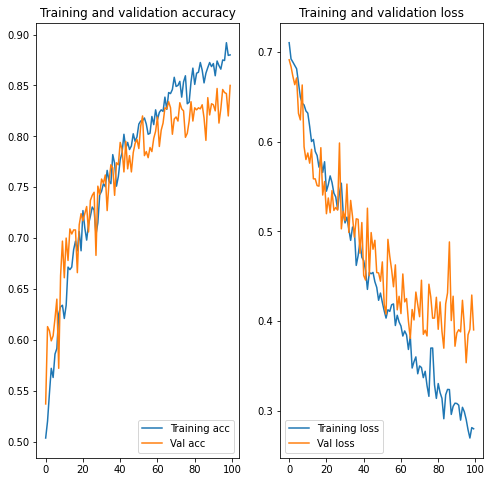

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training acc')
plt.plot(epochs_range, val_acc, label='Val acc')
plt.legend(loc='lower right')
plt.title('Training and validation accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training loss')
plt.plot(epochs_range, val_loss, label='Val loss')
plt.legend(loc='lower left')
plt.title('Training and validation loss')

plt.show()